In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.a

In [6]:
dataset = pd.read_csv('machines.csv', index_col=0)
dataset.columns = ['Vendor_name', 'model', 'MCYT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

### 3.b

In [10]:
dataset.dtypes

Vendor_name    object
model          object
MCYT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [15]:
dataset.loc[:, 'Vendor_name'] = dataset.loc[:, 'Vendor_name'].astype('string')
dataset.dtypes

Vendor_name    string
model          object
MCYT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

### 3.c

In [17]:
dataset['Vendor_name'].unique()

<StringArray>
[      'amdahl',       'apollo',         'basf',          'bti',
    'burroughs',        'c.r.d',          'cdc',       'cambex',
          'dec',           'dg',    'formation',   'four-phase',
        'gould',           'hp',       'harris',    'honeywell',
          'ibm',          'ipl',     'magnuson',    'microdata',
          'nas',          'ncr',      'nixdorf', 'perkin-elmer',
        'prime',      'siemens',       'sperry',       'sratus',
         'wang']
Length: 29, dtype: string

### 3.d

In [28]:
df1 = dataset.loc[(dataset['MMIN'] >= 1000) & (dataset['MMIN'] <= 20000), ['Vendor_name', 'model', 'MMIN', 'MMAX', 'PRP', 'ERP']].reset_index(drop=True)
df1.to_csv('df1.csv', header=True, index=True)
df1.tail(10)

,Vendor_name,model,MMIN,MMAX,PRP,ERP
143,sperry,1100/81,2000,32000,114,182
144,sperry,1100/82,2000,32000,208,227
145,sperry,1100/83,2000,32000,307,341
146,sperry,1100/84,4000,32000,397,360
147,sperry,1100/93,8000,64000,915,919
148,sperry,1100/94,8000,64000,1150,978
149,sperry,80/8,1000,8000,42,37
150,sperry,90/80-model-3,1000,8000,46,50
151,sratus,32,2000,8000,52,41
152,wang,vs-90,1000,4000,45,25


### 3.e

In [45]:
dataset[dataset['model'].str.startswith('b')]

,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
15,burroughs,b1955,167,524,2000,8,4,15,19,23
16,burroughs,b2900,143,512,5000,0,7,32,28,29
17,burroughs,b2925,143,1000,2000,0,5,16,31,22
18,burroughs,b4955,110,5000,5000,142,8,64,120,124
19,burroughs,b5900,143,1500,6300,0,5,32,30,35
20,burroughs,b5920,143,3100,6200,0,5,20,33,39
21,burroughs,b6900,143,2300,6200,0,6,64,61,40
22,burroughs,b6925,110,3100,6200,0,6,64,76,45


### 3.f

In [53]:
print(f'ERP Mean: {dataset["ERP"].mean(): .4f}')
print(f'ERP Std: {dataset["ERP"].std(): .4f}')
dataset.loc[dataset['ERP'].argmax(), :]

ERP Mean:  98.8510
ERP Std:  154.9750


Vendor_name      amdahl
model          580-5880
MCYT                 23
MMIN              32000
MMAX              64000
CACH                128
CHMIN                32
CHMAX                64
PRP                1144
ERP                1238
Name: 8, dtype: object

### 3.g

In [62]:
dataset.groupby('Vendor_name').aggregate({
    'Vendor_name': 'count',
    'ERP': ['min', 'max']
})

Vendor_name  ERP      
                   count  min   max
Vendor_name                        
amdahl                 9  132  1238
apollo                 2   23    24
basf                   2   70   117
bti                    2   15    64
burroughs              8   22   124
c.r.d                  6   21    28
cambex                 5   30    74
cdc                    9   23   138
dec                    6   18    54
dg                     7   19    72
formation              5   34    34
four-phase             1   19    19
gould                  3   75   157
harris                 7   18    53
honeywell             13   20   181
hp                     7   18    54
ibm                   32   15   361
ipl                    6   30   128
magnuson               6   37    88
microdata              1   33    33
nas                   19   29   603
ncr                   13   19   281
nixdorf                3   21    67
perkin-elmer           3   24    64
prime                  5   20    53
siemens               12   19   382
sperry                13   24   978
sratus                 1   41    41
wang                   2   25    47

### 3.h

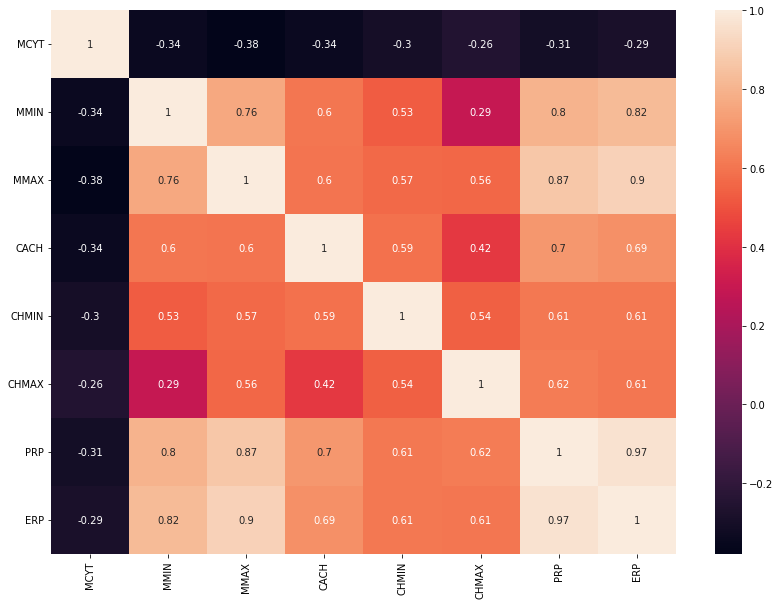

In [66]:
fig, ax = plt.subplots()
sns.heatmap(dataset.corr('pearson'), ax=ax, annot=True)
fig.set_size_inches((14, 10))

The most correlated features are PRP and ERP. Also, MMIN and MMAX are correlated with each other and both of them are correlated to both of PRP and ERP.